In [ ]:
import pandas as pd

In [ ]:
path= '/content/drive/MyDrive/UPIITA/CONTAMYMETEOROLOGIA/contaminantes/'
localPath= 'mediaspormes/'

MEDICIONES POR ELEMENTOS


In [ ]:
df=pd.read_csv(path + localPath + 'mediasContaminantesCoordenadas.csv',encoding='latin-1',parse_dates=["date"])
df.head()


,date,id_parameter,value,unit,cve_estac,nom_estac,longitud,latitud,alt,obs_estac
0,2021-01-31,CO,0.363771,15.0,ACO,Acolman,-98.912003,19.635501,2198.0,NaN
1,2021-01-31,NO,10.666551,1.0,ACO,Acolman,-98.912003,19.635501,2198.0,NaN
2,2021-01-31,NO2,19.738866,1.0,ACO,Acolman,-98.912003,19.635501,2198.0,NaN
3,2021-01-31,NOX,30.712201,1.0,ACO,Acolman,-98.912003,19.635501,2198.0,NaN
4,2021-01-31,O3,31.176280,1.0,ACO,Acolman,-98.912003,19.635501,2198.0,NaN


GENERAMOS UNA FUNCIÓN PARA QUE SE HAGAN LOS CÁLCULOS POR ELEMENTO Y AL 
MISMO TIEMPO GUARDE EL RESULTADO EN UN ARCHIVO SEPARADO POR CADA CONTAMINANTE

In [ ]:
elementos= df['id_parameter'].unique()
elementos


array(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'SO2', 'PM2.5', 'PMCO'],
      dtype=object)

In [ ]:
def media_elemento_estacion(elemento): 
    filter = df['id_parameter']== elemento
    so2filter=df[filter]
    so2filter
    so2_grp = so2filter.groupby('cve_estac')
    #so2_week = so2filter.groupby([so2filter['date'].dt.isocalendar().week,'cve_estac'])['value'].mean()
    so2_media = so2_grp['value'].agg(['mean','max','min','std'])
    #so2_media = so2_grp['value'].agg(['mean'])
    so2_media
    df_indiv=pd.DataFrame()
    df_indiv ['cve_estac']=df['cve_estac'].unique()
    df_indiv['latitud']=df['latitud'].unique()
    df_indiv['longitud']=df['longitud'].unique()
    df_indiv = df_indiv.merge(so2_media, on='cve_estac', how='left').dropna()
    ##Para análisis en GIS
    df_indiv.to_csv(path + localPath +elemento +'_mediaPorEstacion3.csv',index=False)#para que no se agregue el índice de cada archiv
   
   

In [ ]:
#Ejecutar por cada elemento o bien en un for
media_elemento_estacion("CO")#['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'SO2', 'PM2.5', 'PMCO']

In [ ]:
 df_graph=pd.read_csv(path + localPath +'CO_mediaPorEstacion3.csv')#para que no se agregue el índice de cada archiv

In [ ]:
df_graph[].unique()

array([0.72290021, 0.74604862, 0.7957303 , 0.94307663, 1.15616029,
       0.91218052, 0.92277013, 0.78943395, 1.04495036, 0.47089464,
       1.18081109, 0.60980665, 1.38034643, 0.97073363, 1.19073657,
       1.29047673, 1.04203274, 0.57983906, 1.02201319, 0.74446536,
       0.7236953 , 1.12591992, 1.10557505, 1.17849425, 0.87171653,
       0.81732911, 1.04611628, 0.73600758, 1.54728219, 1.0624648 ])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

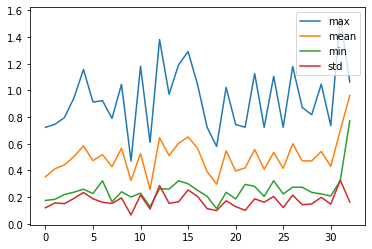

In [ ]:

df_graph[['max','mean','min','std']].plot()